# ESM 203 Word Clouds, Fall 2020

This script parses some of the pre-class survey data and makes some wordclouds

In [3]:
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO
import requests
figsize = 15
url = 'https://raw.githubusercontent.com/environmental-data-science/ESM_203/master/'

## Load the data


In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/environmental-data-science/ESM_203/master/data/class_questions.csv')

In [88]:
df.columns = ['most_interested', 'most_worried', 'better_at', 'missed_question', 'earth']
df.head()

,most_interested,most_worried,better_at,missed_question,earth
0,how this course will apply to my everyday pers...,knowing the different cycles and their relatio...,understanding the different cycles and seeing ...,NaN,Home
1,Climatology,Not sure,Better understanding of and able to explain oc...,Level of background with this material,Home
2,Ocean circulation,Being overwhelmed with the amount of informati...,Understanding the many equations in the class,NaN,Complex
3,I love learning about how the abiotic and biot...,Honestly I'm a bit worried about how much of t...,I'm always interested in adding more knowledge...,NaN,Improbable
4,Everything!,The online format,Thinking about earth system sciences,NaN,Ball


## Concatenate responses into a single string of text for `WordCloud`. 

In [89]:
most_interested_text = " ".join(df['most_interested'].dropna().to_list())
most_worried_text = " ".join(df['most_worried'].dropna().to_list())
better_at_text = " ".join(df['better_at'].dropna().to_list())
earth_text = " ".join(df['earth'].dropna().to_list())

## Make the word clouds!

### 1. With respect to ESM 203, you are most interested in learning about:

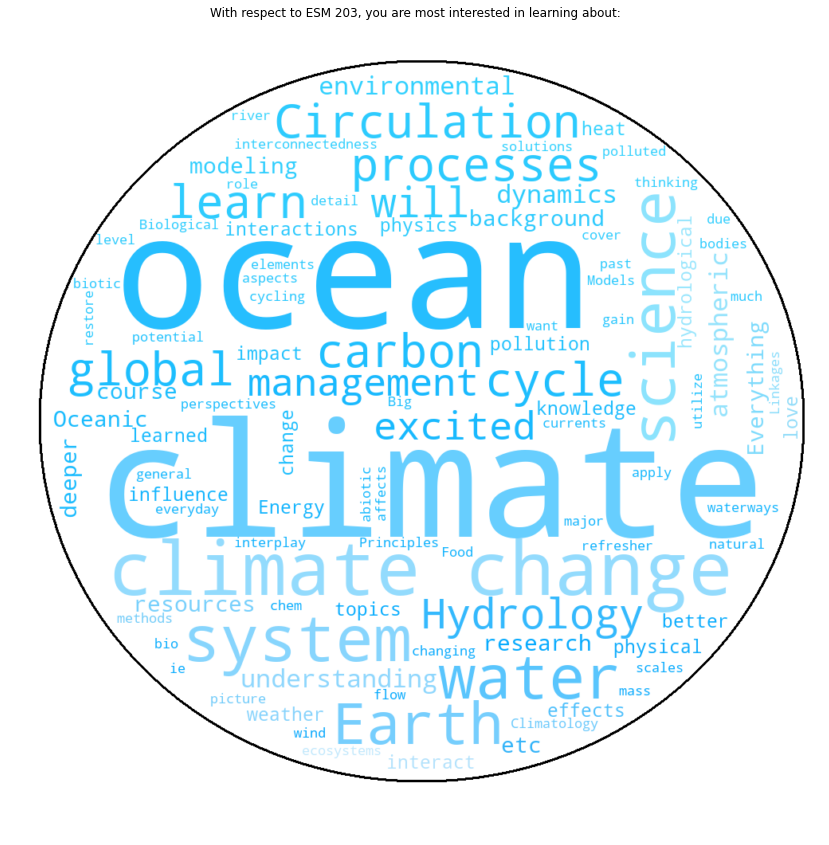

In [104]:
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["interested", "learning"])
response = requests.get(url + 'data/circle_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(most_interested_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('With respect to ESM 203, you are most interested in learning about:')
plt.axis("off")
plt.show()

### 2. With respect to ESM 203, you are most worried about:

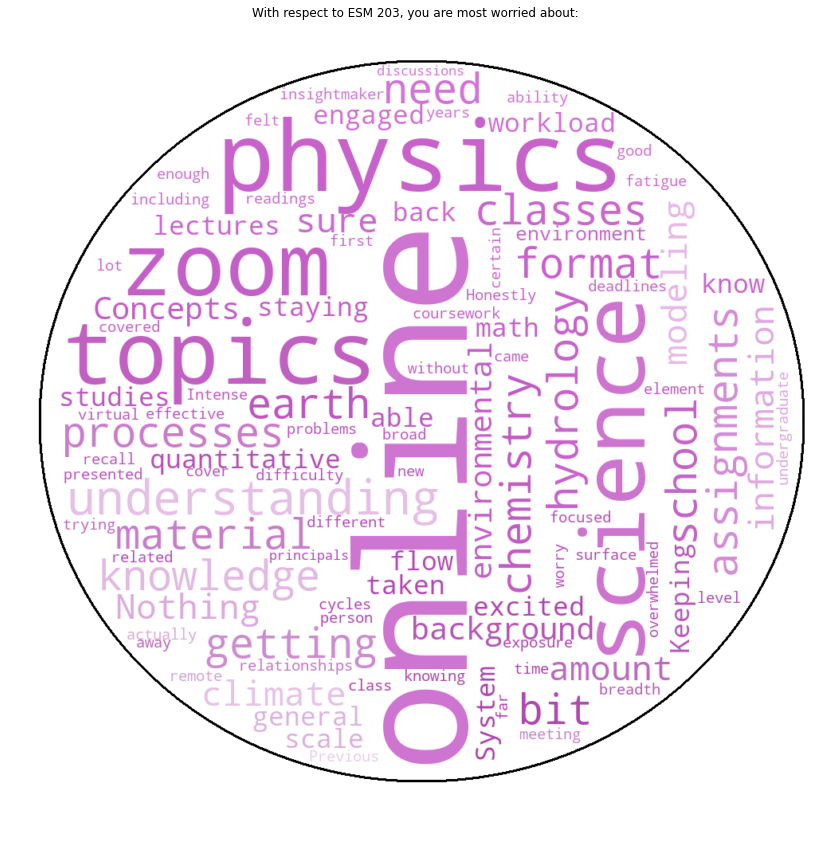

In [105]:
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["worried", "learning", "course", "topic", "lack", "will", "much"])

response = requests.get(url + 'data/worried_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(most_worried_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('With respect to ESM 203, you are most worried about:')
plt.axis("off")
plt.show()

### 3. At the end of this class, one thing you would like to be better at than you are now is:

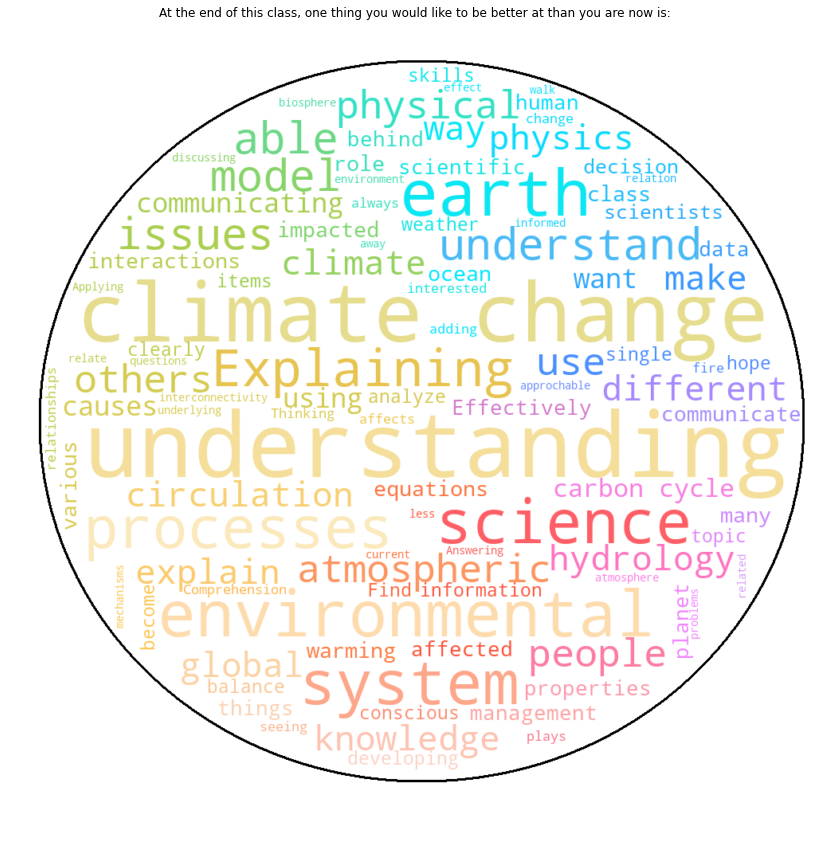

In [106]:
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["better"])

response = requests.get(url + 'data/better_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(better_at_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('At the end of this class, one thing you would like to be better at than you are now is:')
plt.axis("off")
plt.show()

### 4. In a word, describe the Earth:

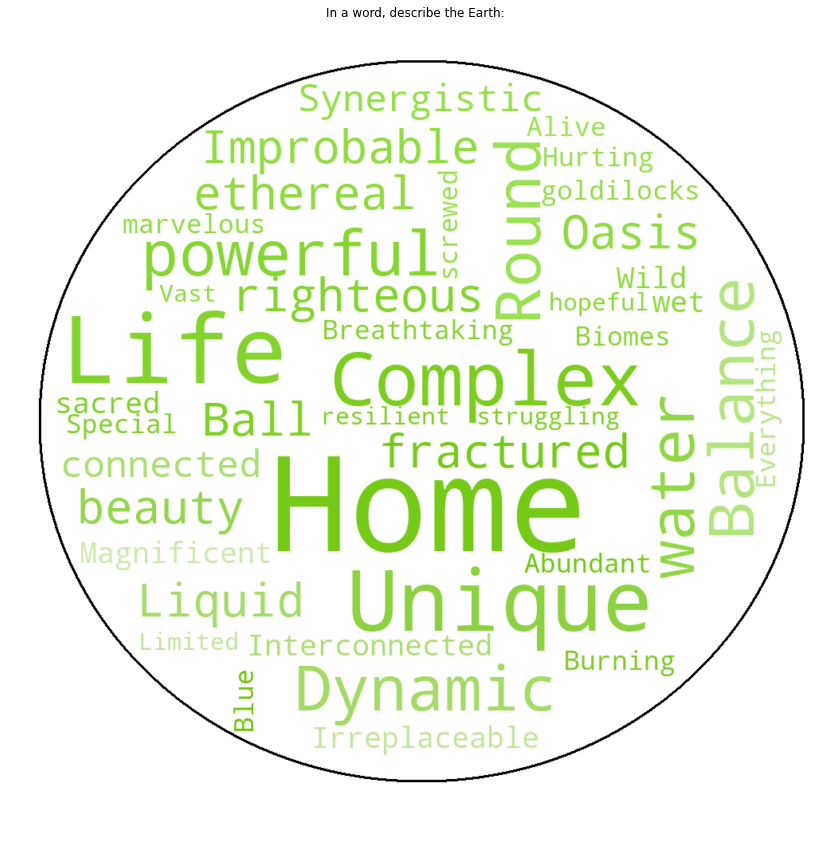

In [107]:
max_words = 100
stopwords = set(STOPWORDS)

response = requests.get(url + 'data/earth_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(earth_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('In a word, describe the Earth:')
plt.axis("off")
plt.show()